In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D

from sklearn.model_selection import train_test_split
import tensorflow as tf


e:\do_an_tot_nghiep\dev\env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
e:\do_an_tot_nghiep\dev\env\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
e:\do_an_tot_nghiep\dev\env\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [11]:
col_names = [
    'flow_duration',
    'Header_Length',
    'Protocol_Type',
    'Duration',
    'Rate',
    'Srate',
    'Drate',
    'fin_flag_number',
    'syn_flag_number',
    'rst_flag_number',
    'psh_flag_number',
    'ack_flag_number',
    'ece_flag_number',
    'cwr_flag_number',
    'ack_count',
    'syn_count',
    'fin_count',
    'urg_count',
    'rst_count',
    'HTTP',
    'HTTPS',
    'DNS',
    'Telnet',
    'SMTP',
    'SSH',
    'IRC',
    'TCP',
    'UDP',
    'DHCP',
    'ARP',
    'ICMP',
    'IPv',
    'LLC',
    'tot_sum',
    'Min',
    'Max',
    'AVG',
    'Std',
    'Tot_size',
    'IAT',
    'Number',
    'Magnitue',
    'Radius',
    'Covariance',
    'Variance',
    'Weight',
    'label']

file_paths  = [
    '../data/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '../data/part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '../data/part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv', 
    '../data/part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '../data/part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '../data/part-00005-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '../data/part-00006-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
]

In [12]:
def merge_data_from_multiple_file(file_paths = [], col_names = []):
    data = pd.DataFrame()

    if len(file_paths) == 0:
        raise ValueError('Vui lòng thêm đường dẫn')
    
    for file_path in file_paths: 
        sub_data = pd.read_csv(file_path, names = col_names)

        if len(sub_data) == 0: 
            raise ValueError('Dữ liệu trong file ${}'.format(file_path))
        
        if len(data) == 0: 
            data = pd.concat([data, sub_data])
            continue

        if len(data.columns) != len(data.columns): 
            raise  ValueError('số lượng cột không khớp ! Vui lòng kiểm tra lại số lượng cột')
        
        data = pd.concat([data, sub_data])

    return data

data = merge_data_from_multiple_file(file_paths=file_paths, col_names= col_names)

### Phân chia thành 2 tập dữ liệu
- Tập dữ liệu tấn công 
- Tập dữ liệu bình thường

###  Tập dữ liệu mất cân bằng


In [4]:
def split_two_classes(data): 
    new_data = data.copy()

    condition_benign_label = new_data['label'] == 'BenignTraffic'
    condition_attack_label = new_data['label'] != 'BenignTraffic'

    benign_label_data = new_data[condition_benign_label]
    attack_label_data = new_data[condition_attack_label]

    return [benign_label_data, attack_label_data]



### Kiểm tra sự phân bố của các field đối với từng nhãn trong tập dữ liệu

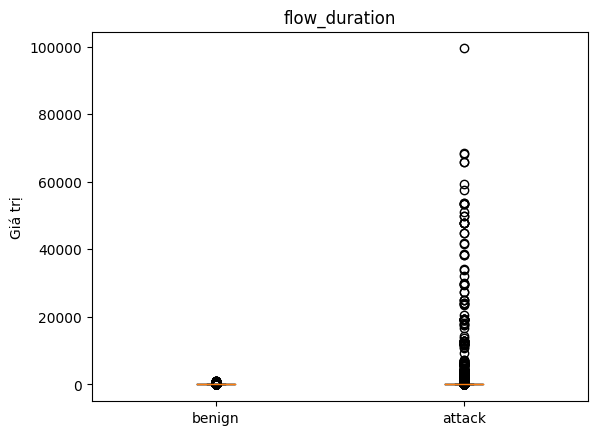

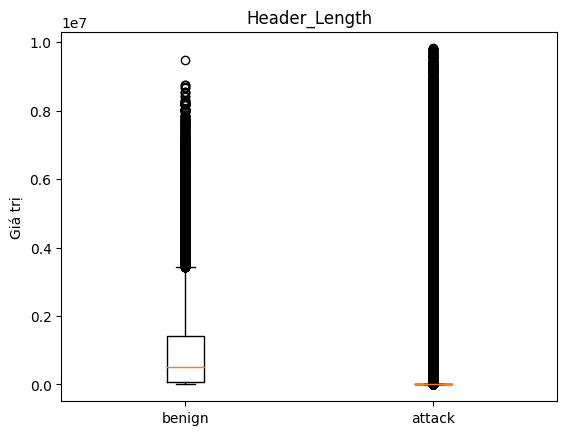

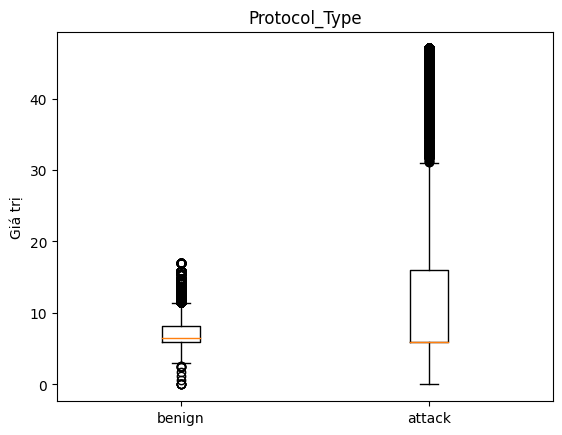

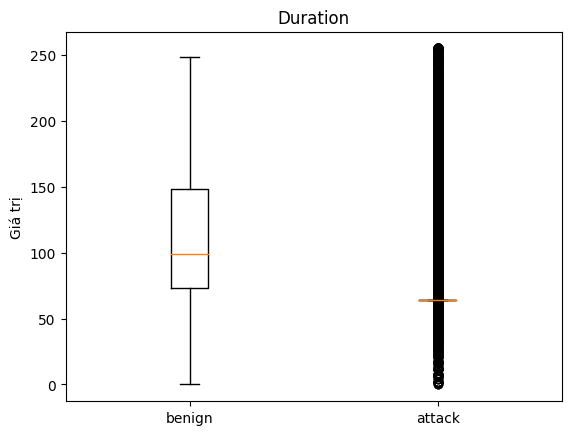

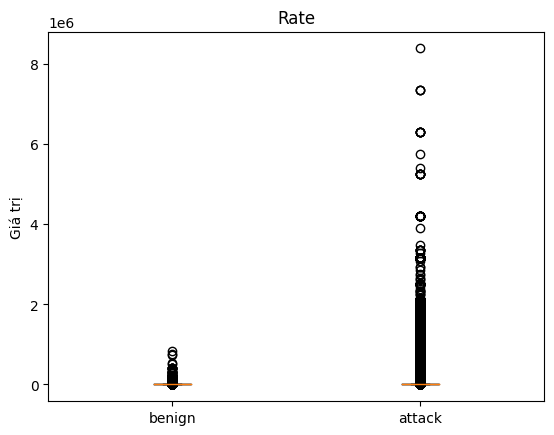

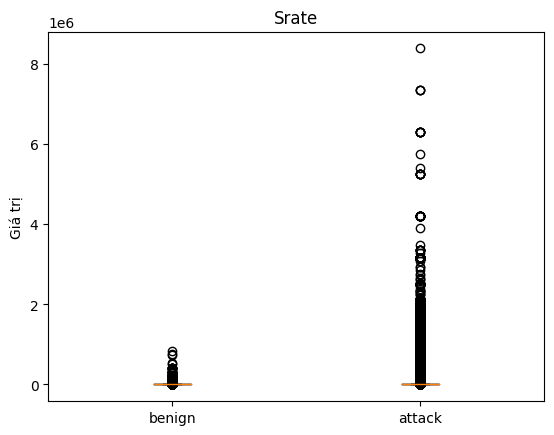

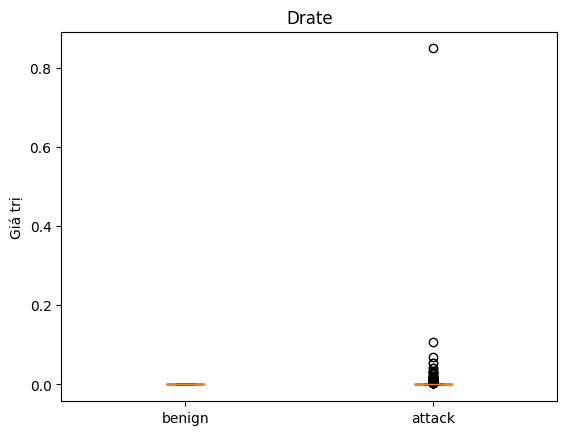

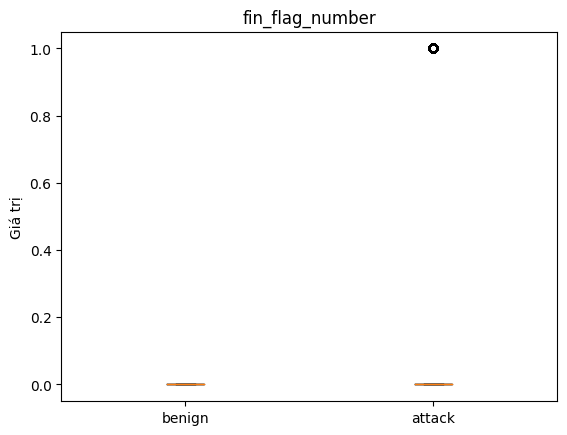

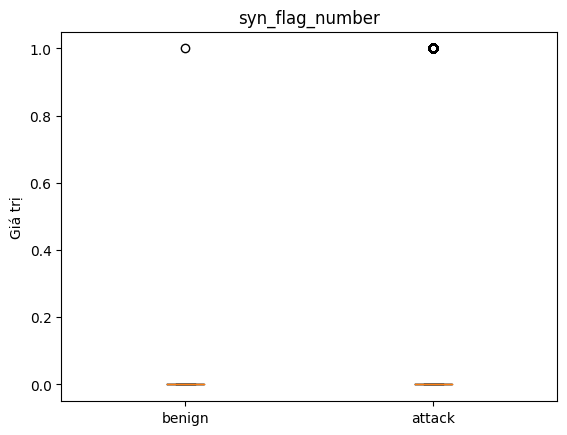

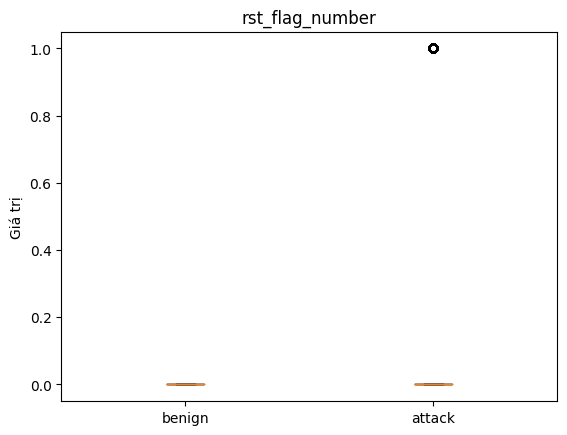

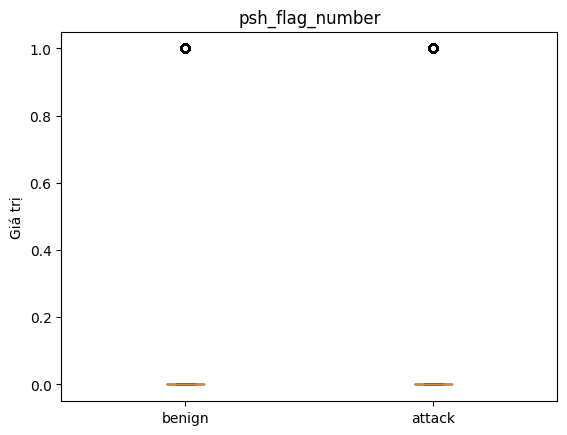

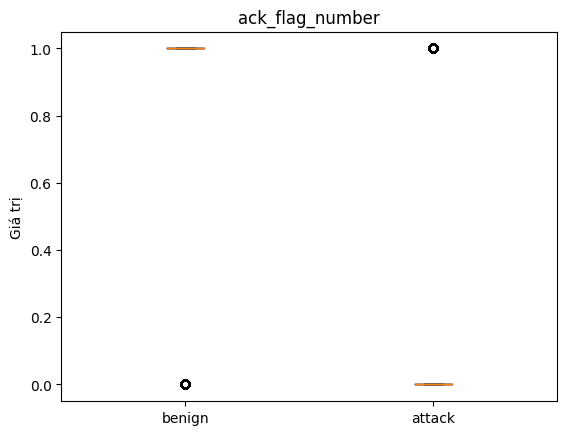

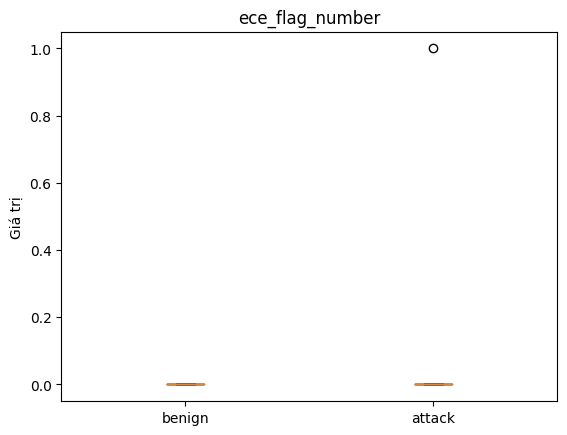

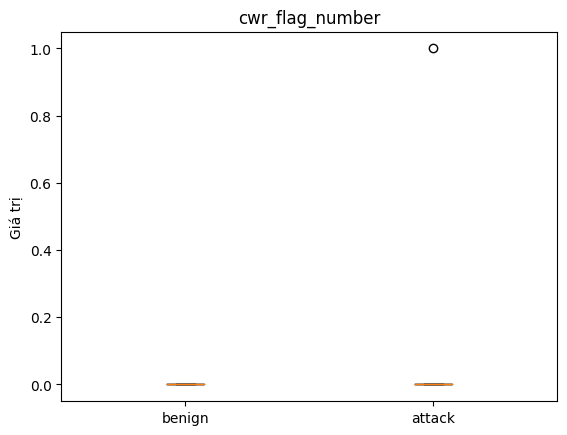

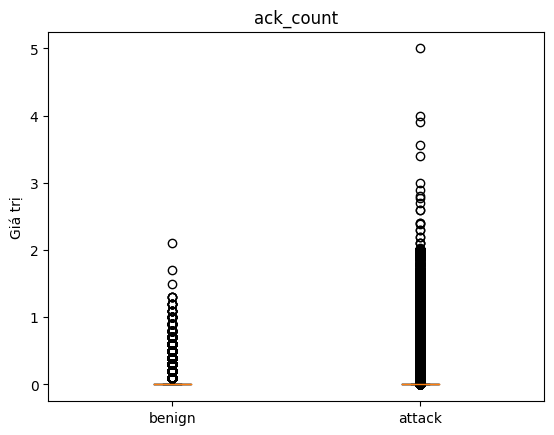

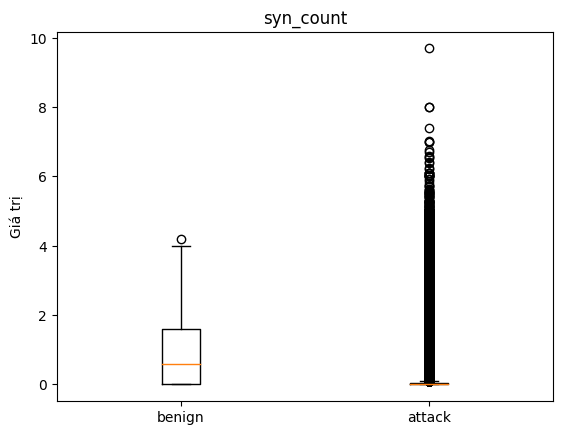

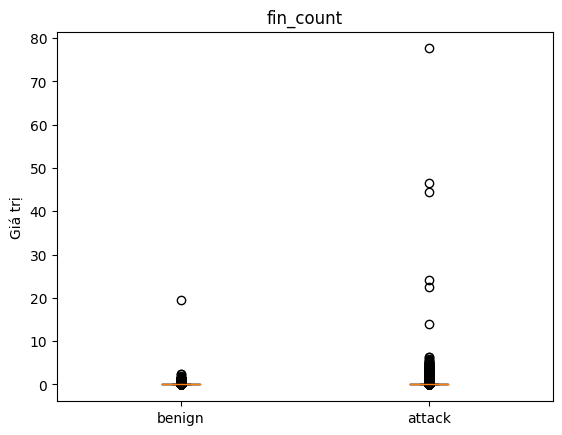

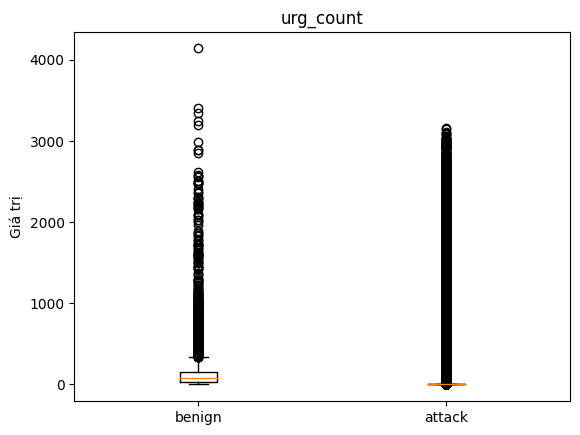

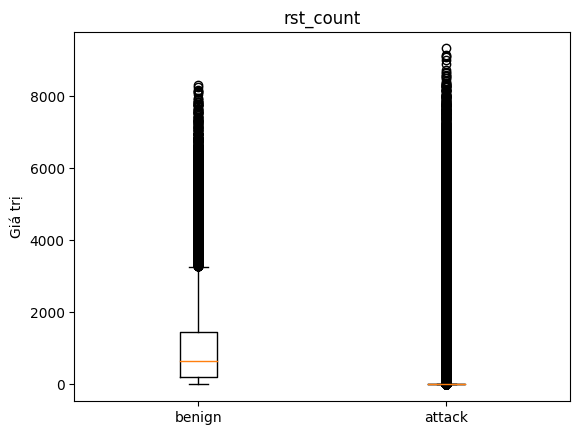

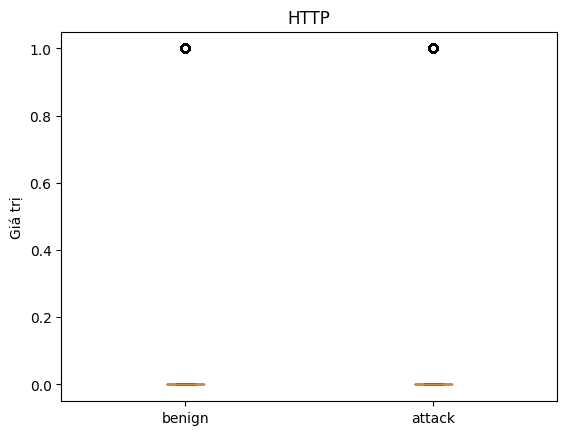

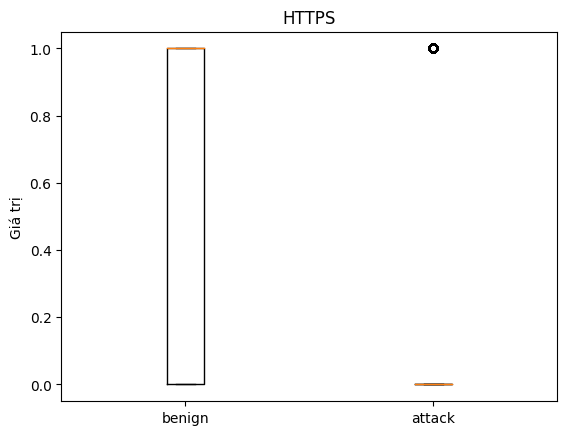

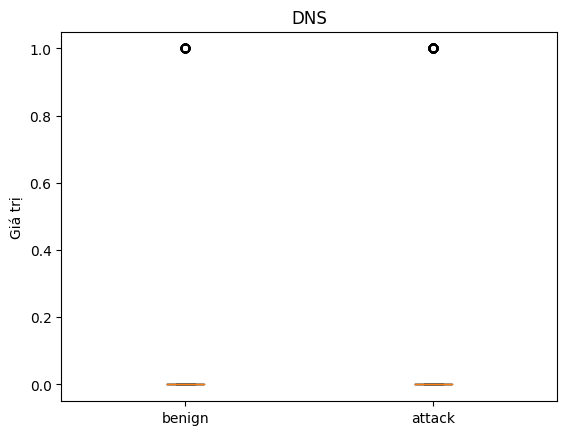

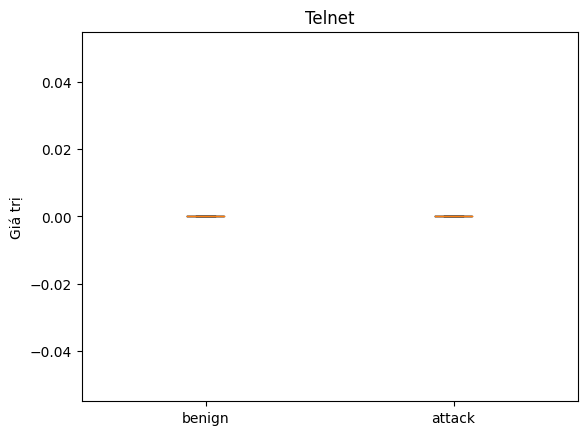

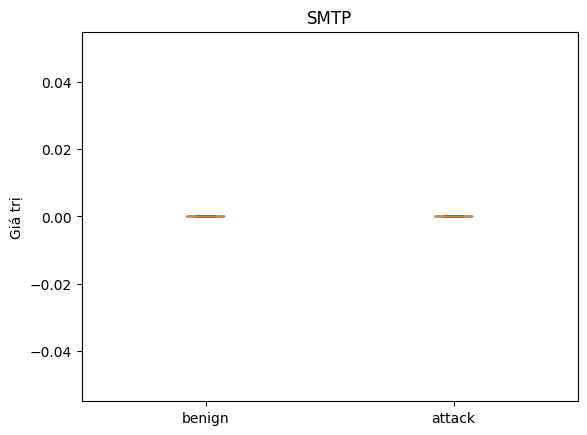

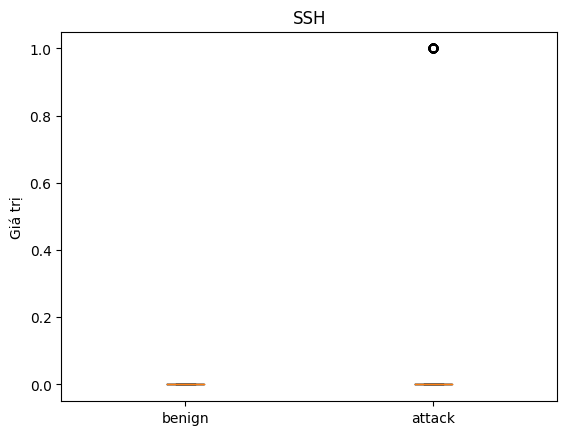

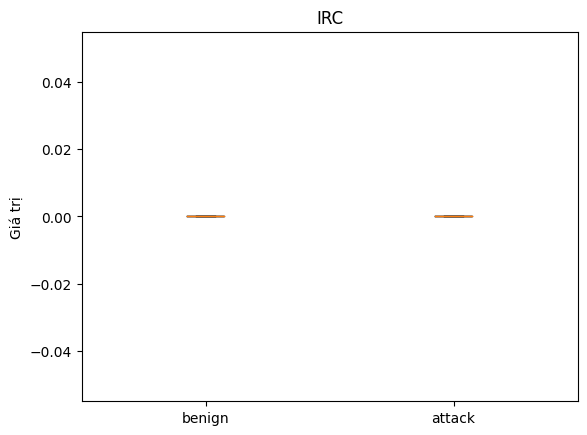

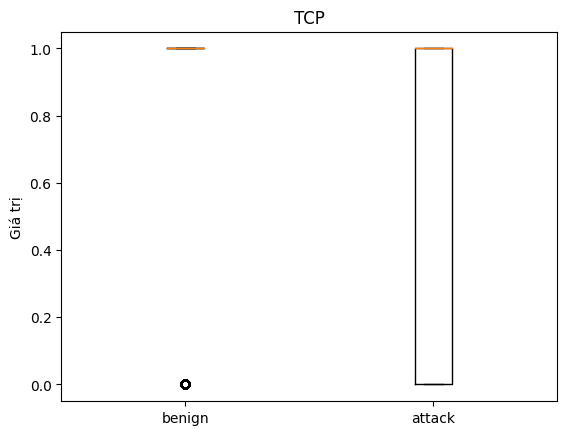

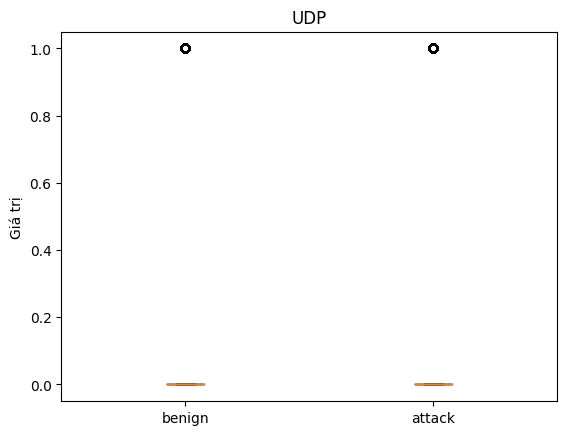

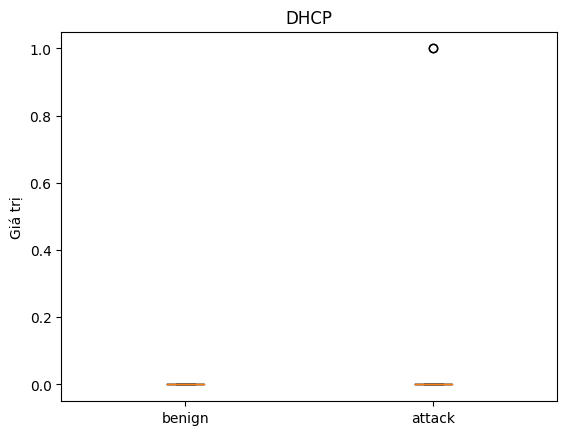

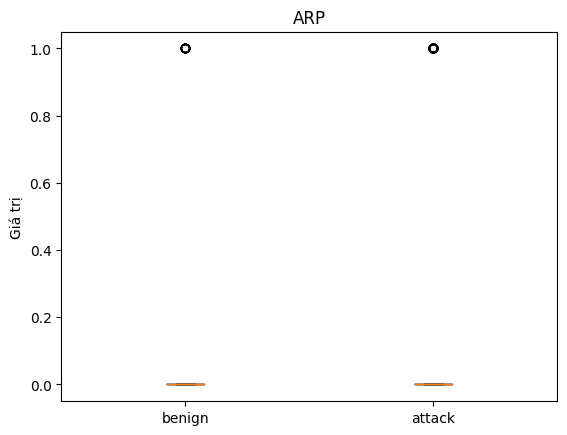

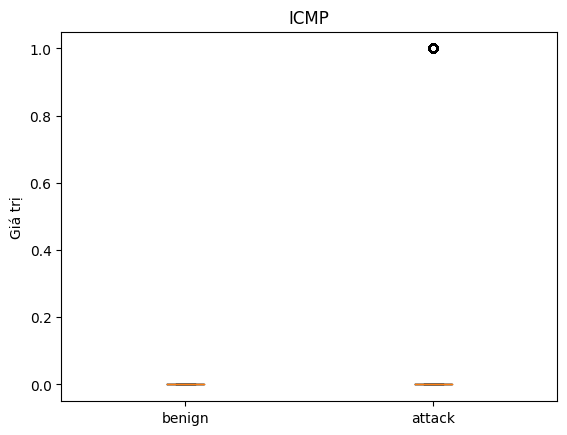

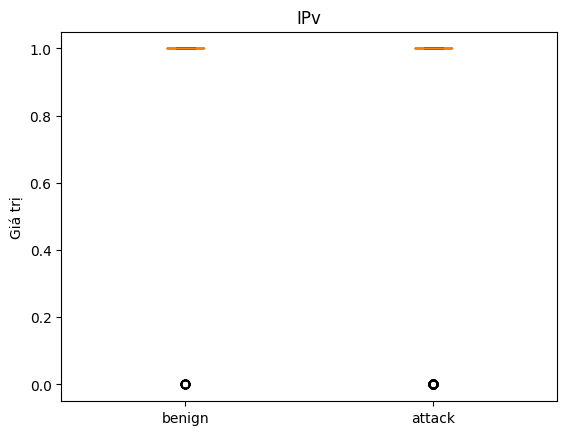

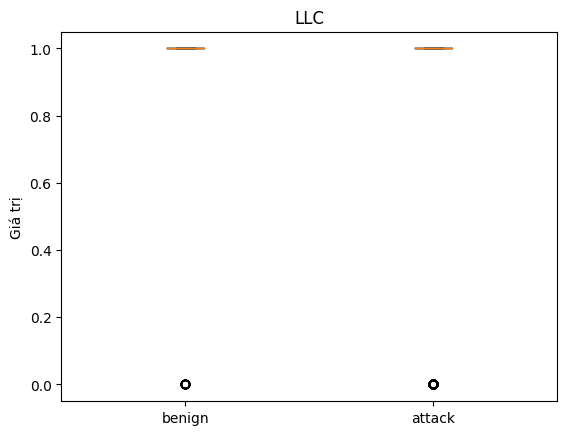

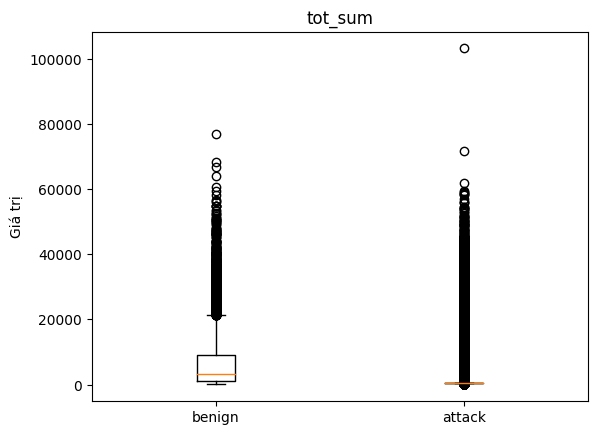

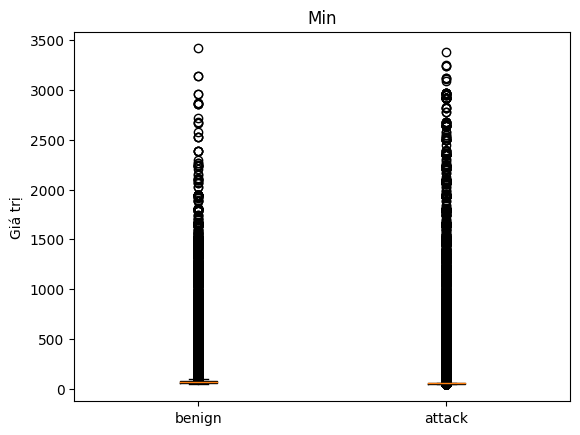

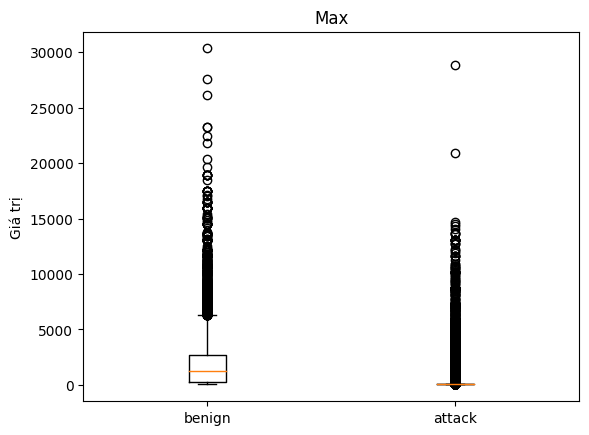

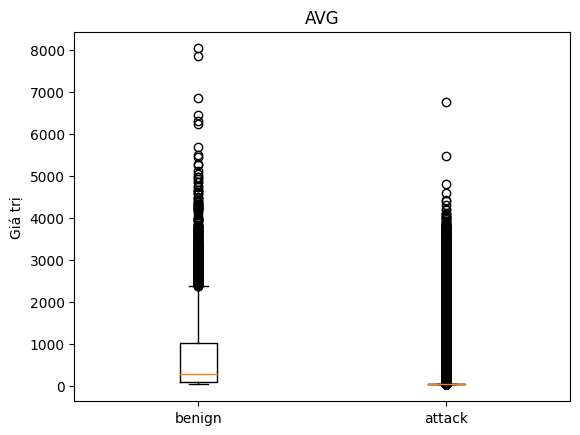

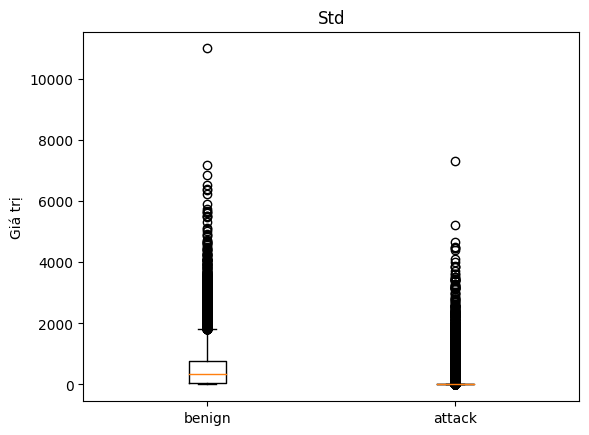

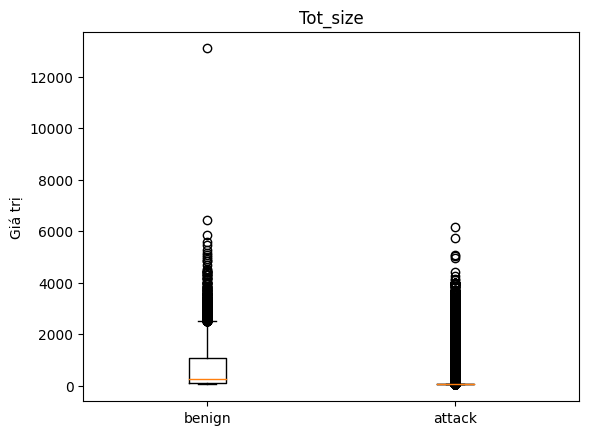

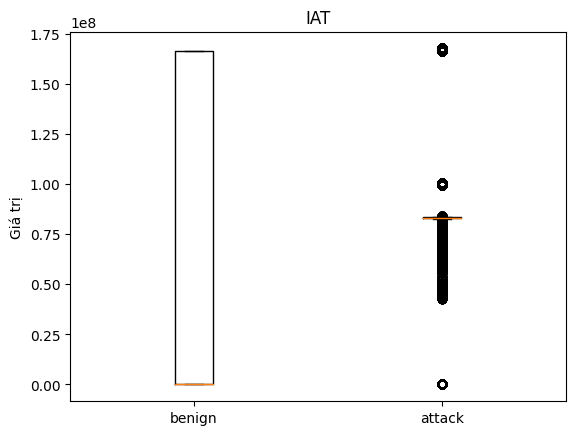

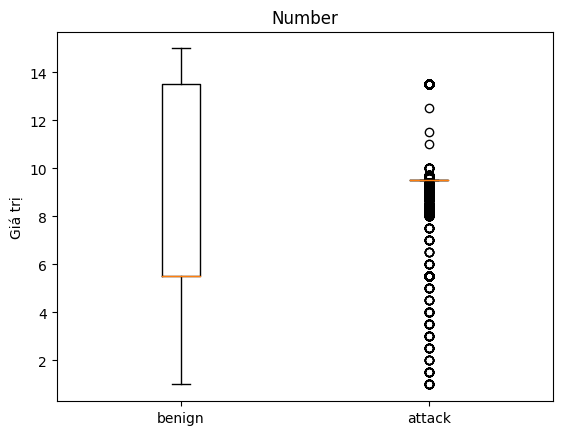

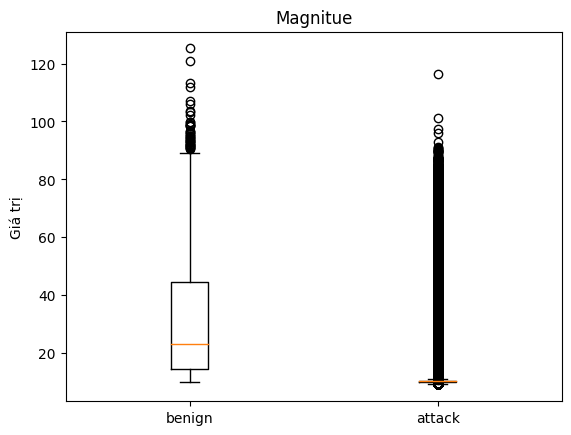

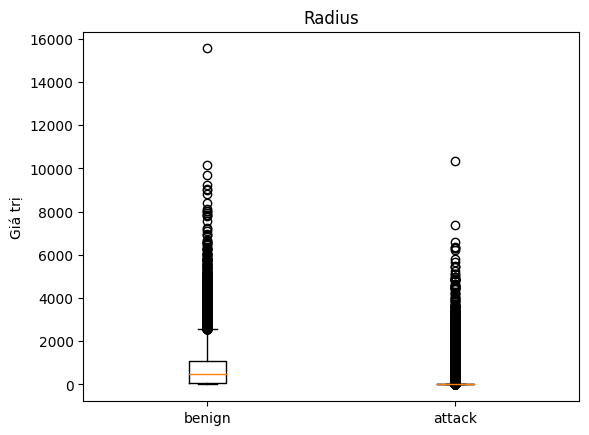

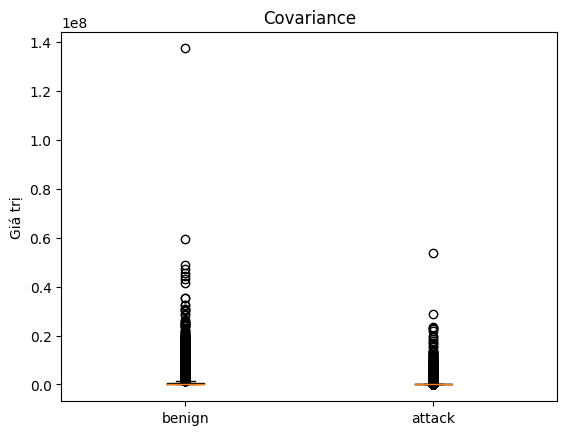

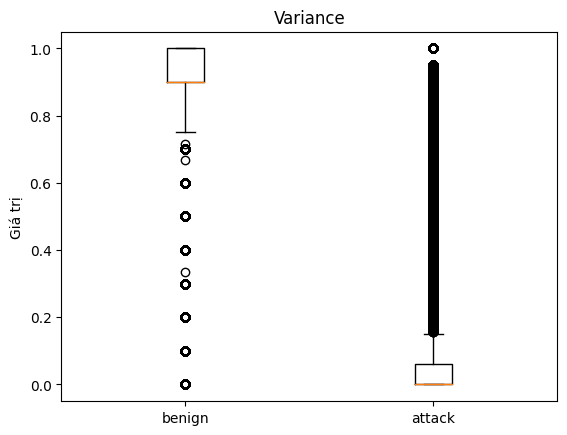

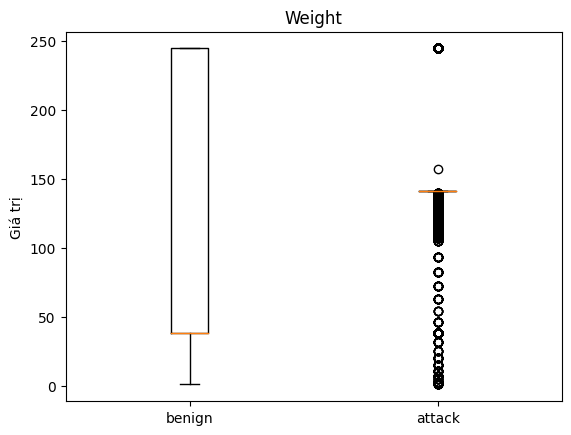

In [6]:
def show_plot_of_attack_and_benign(data = [], title = '', x_labels = []):
    
    plt.boxplot([item.values for item in data], labels=x_labels)
    plt.title(title)
    plt.ylabel('Giá trị')

    plt.show()


def analyze_each_field_of_data(data = [], col_names = []):
    new_data = data.copy()
    x_labels = ['benign', 'attack']
    for col_name in col_names: 
        sub_data = [sub_new_data[col_name] for sub_new_data in new_data]

        show_plot_of_attack_and_benign(sub_data, title=col_name, x_labels=x_labels)
       
        

analyze_each_field_of_data([benign_label_data, attack_label_data], col_names= [
    'flow_duration',
    'Header_Length',
    'Protocol_Type',
    'Duration',
    'Rate',
    'Srate',
    'Drate',
    'fin_flag_number',
    'syn_flag_number',
    'rst_flag_number',
    'psh_flag_number',
    'ack_flag_number',
    'ece_flag_number',
    'cwr_flag_number',
    'ack_count',
    'syn_count',
    'fin_count',
    'urg_count',
    'rst_count',
    'HTTP',
    'HTTPS',
    'DNS',
    'Telnet',
    'SMTP',
    'SSH',
    'IRC',
    'TCP',
    'UDP',
    'DHCP',
    'ARP',
    'ICMP',
    'IPv',
    'LLC',
    'tot_sum',
    'Min',
    'Max',
    'AVG',
    'Std',
    'Tot_size',
    'IAT',
    'Number',
    'Magnitue',
    'Radius',
    'Covariance',
    'Variance',
    'Weight',
])

### Kiểm tra sự phân bố dữ liệu trong các field của  dataset CIC IOT 2023

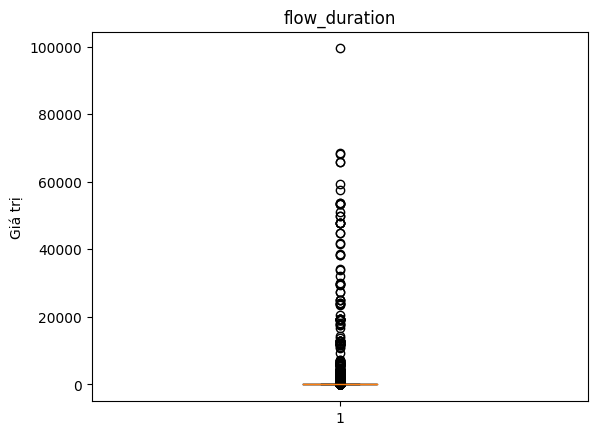

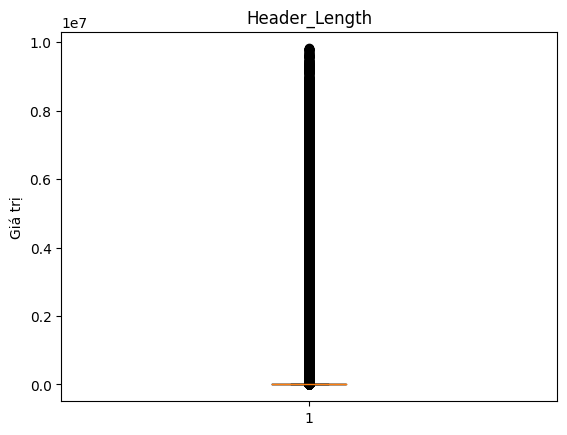

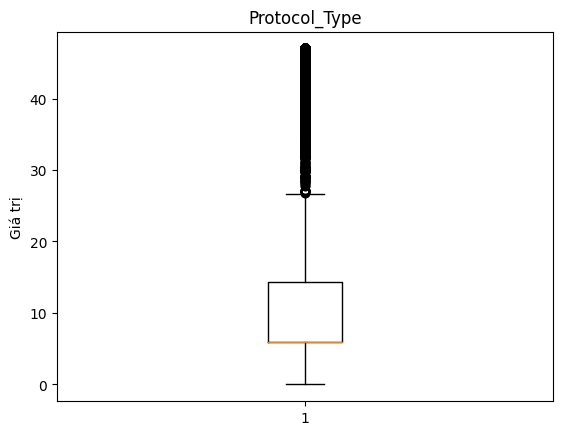

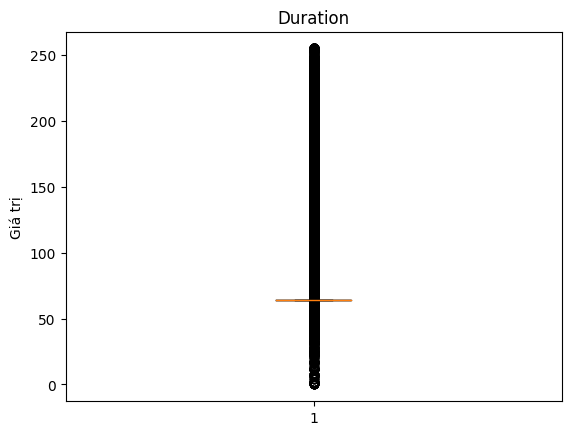

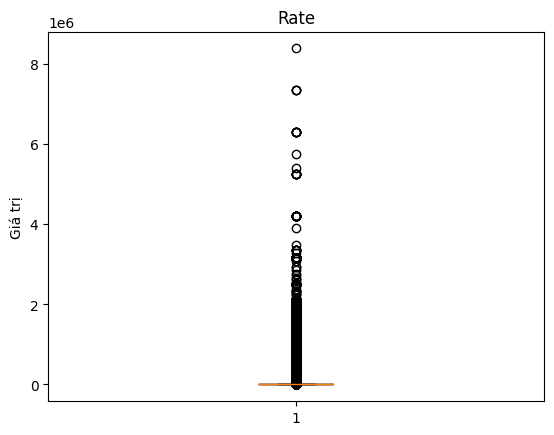

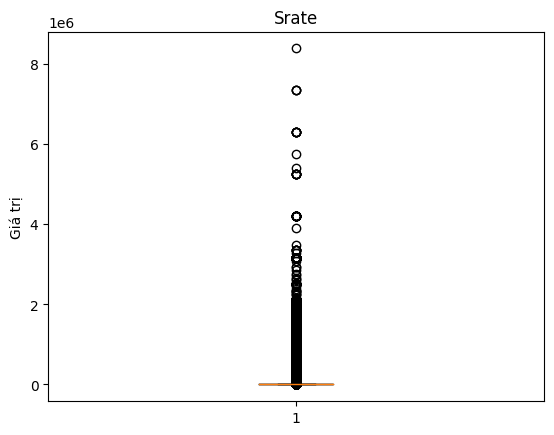

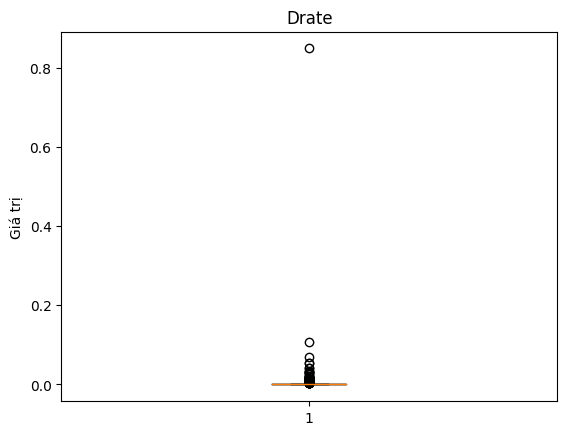

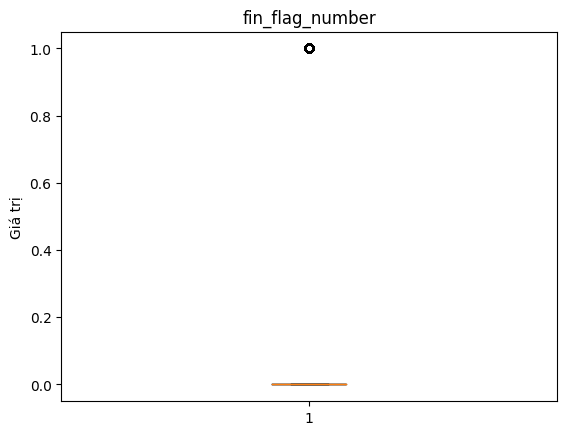

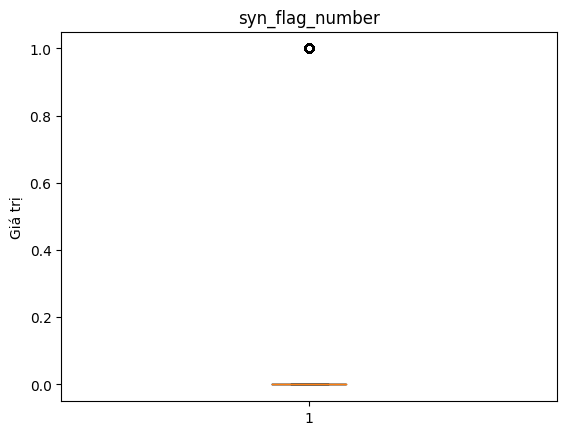

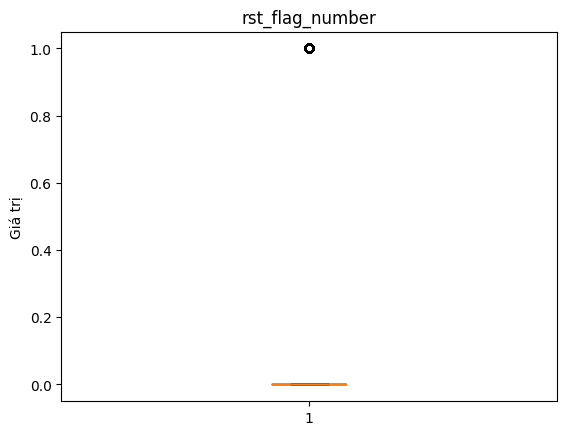

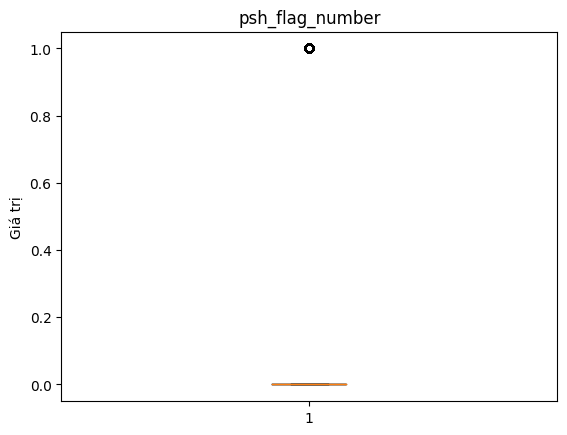

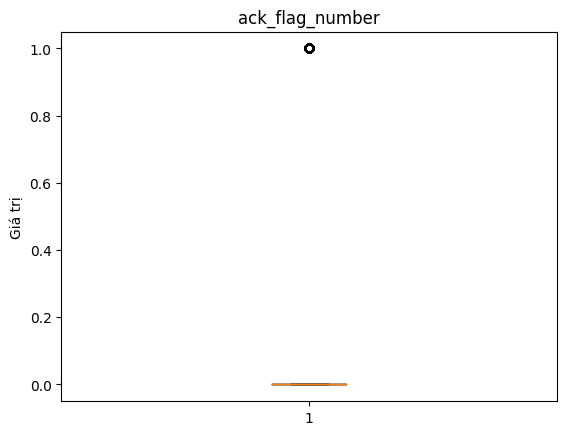

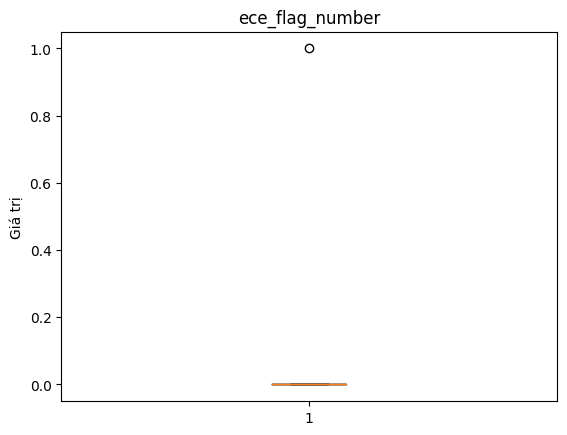

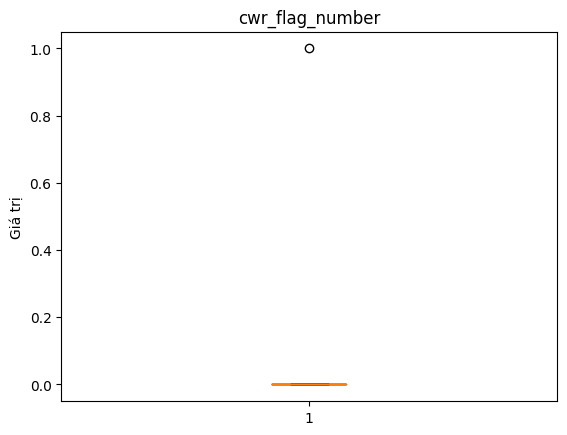

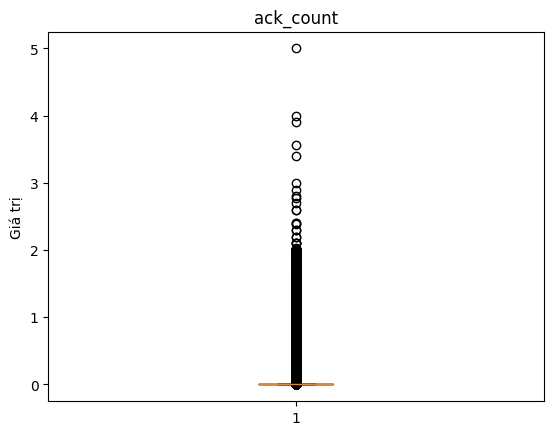

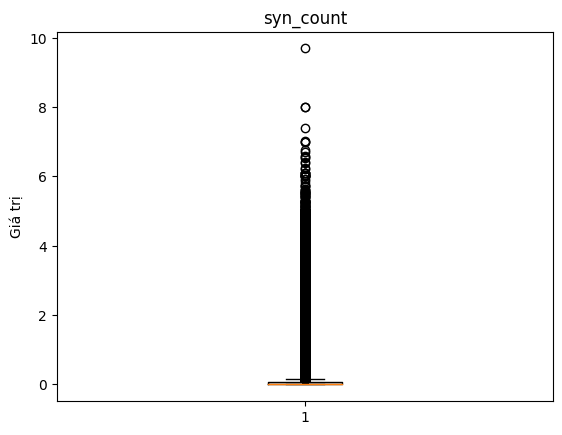

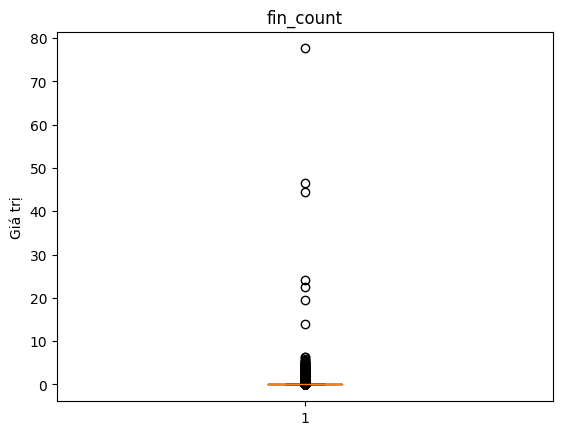

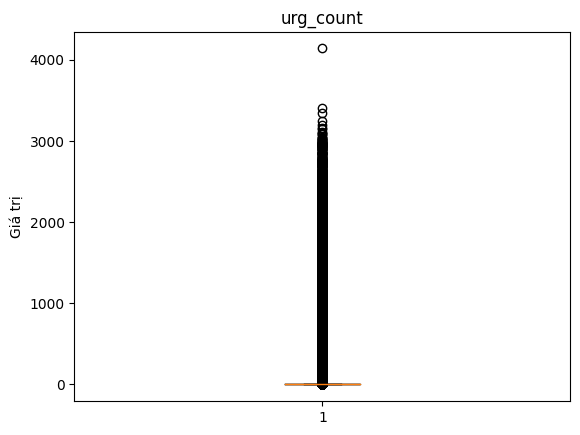

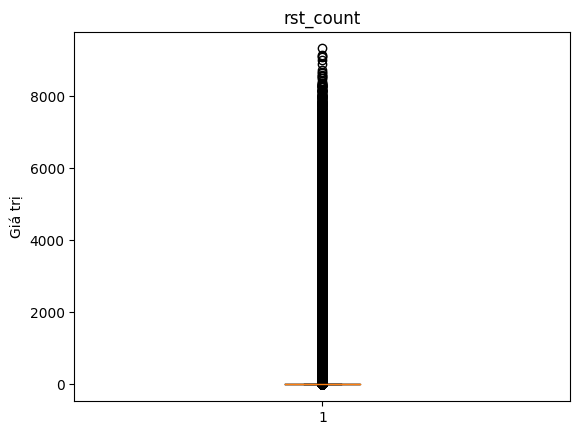

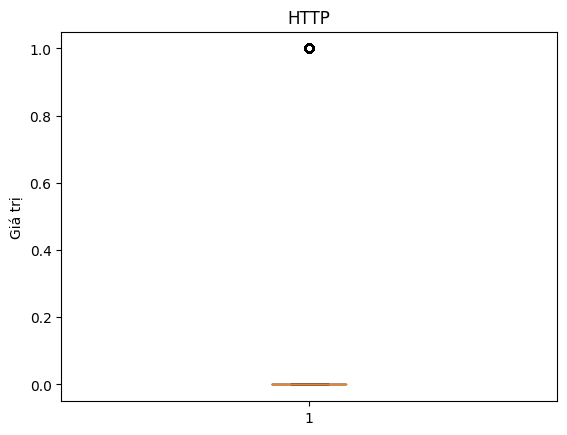

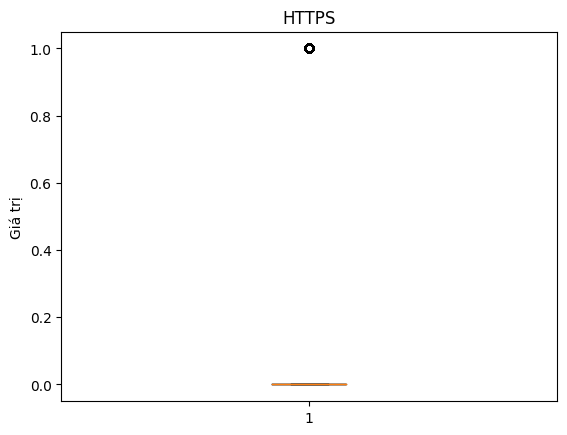

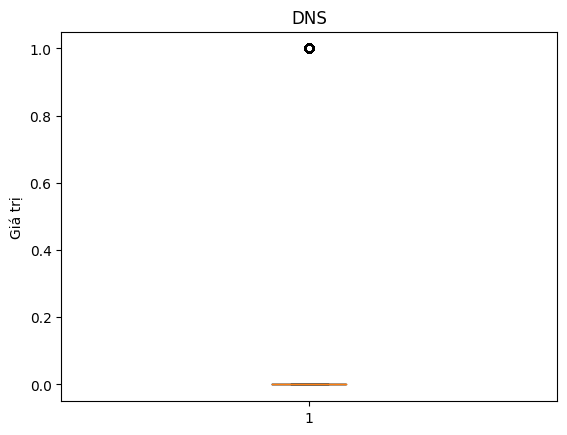

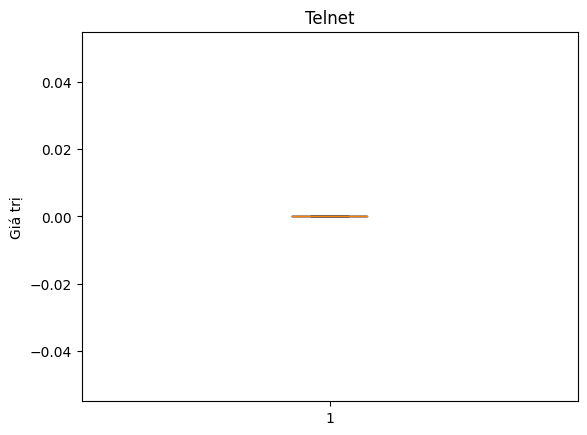

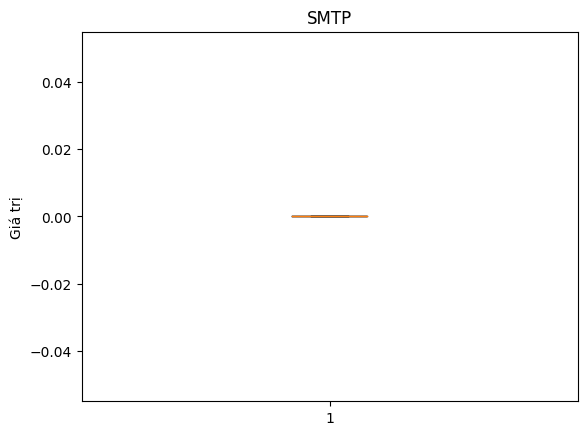

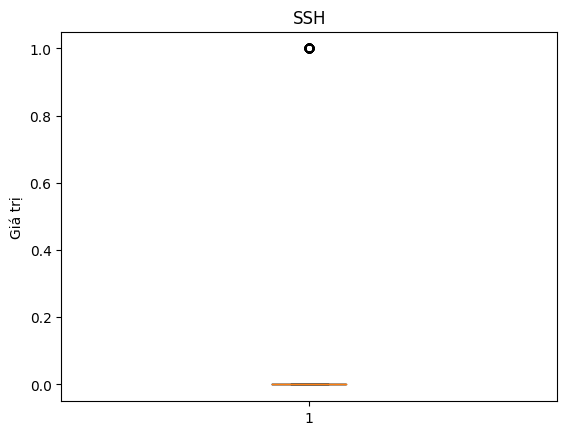

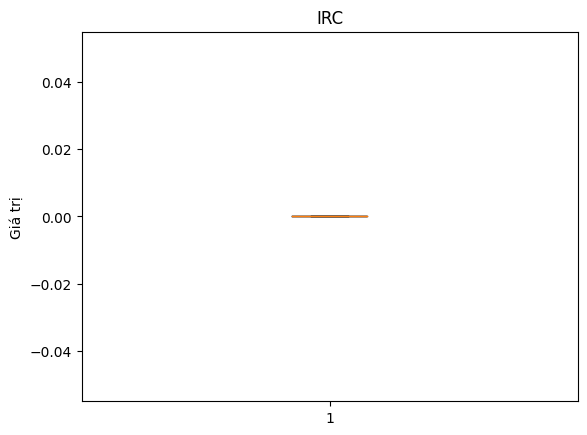

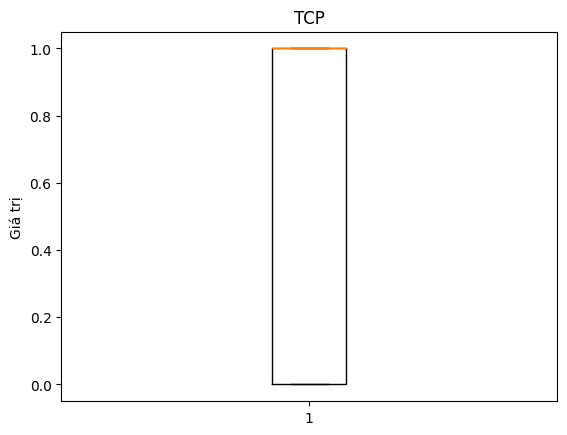

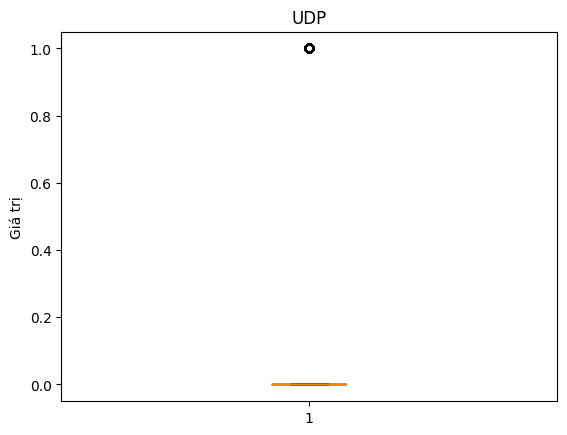

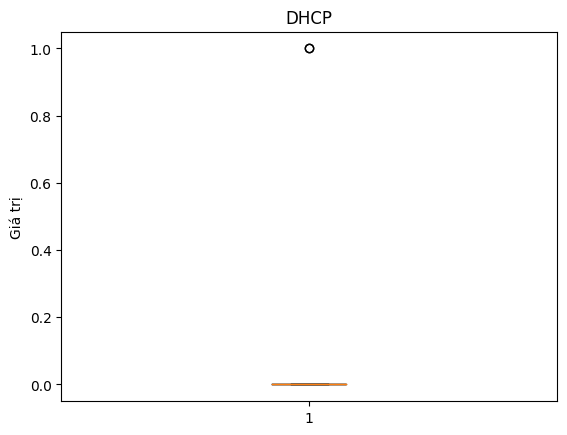

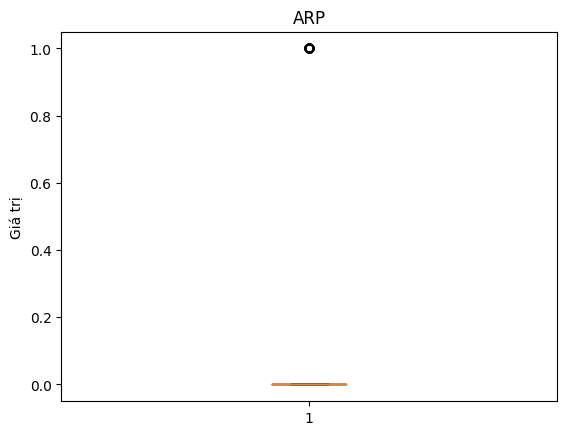

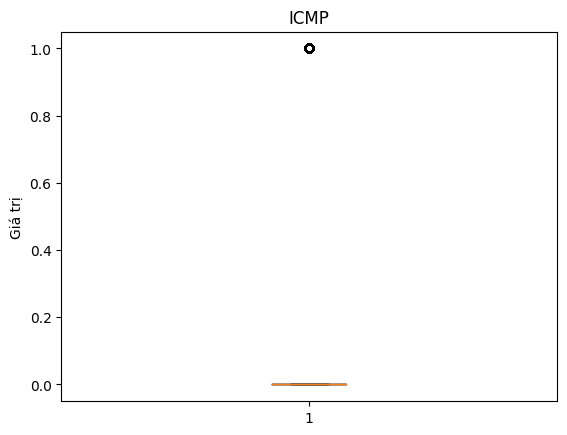

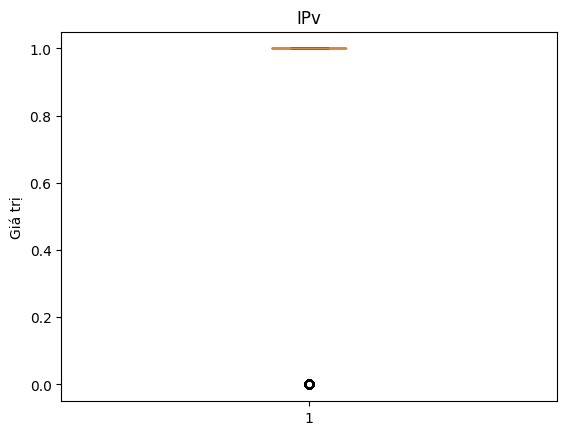

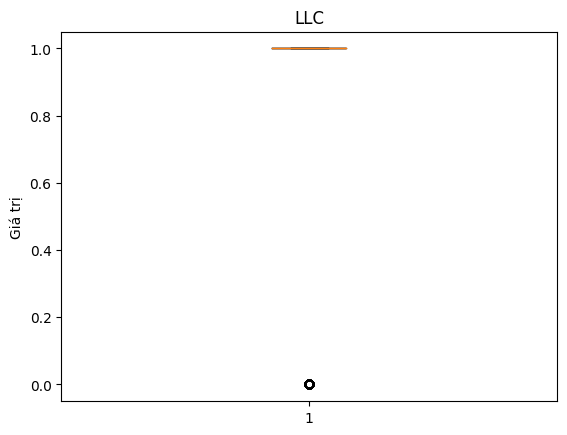

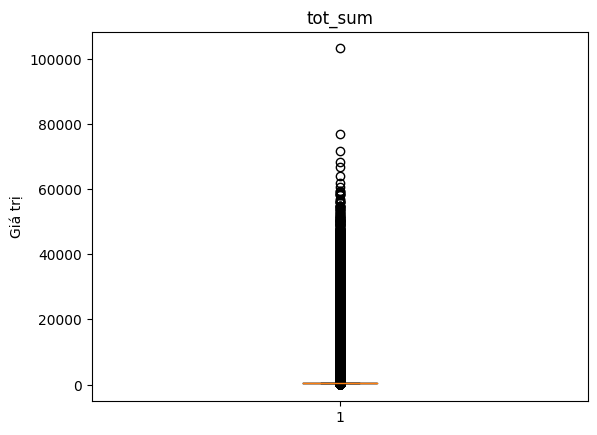

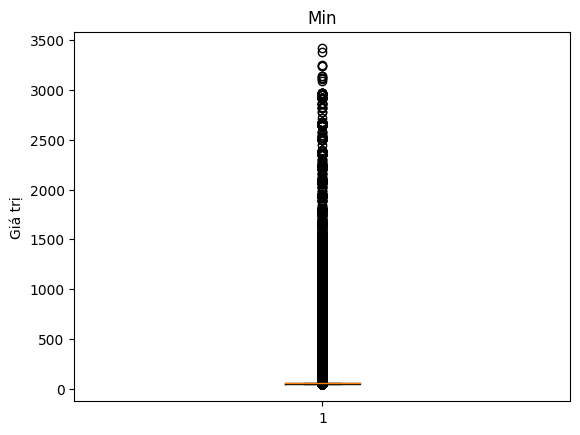

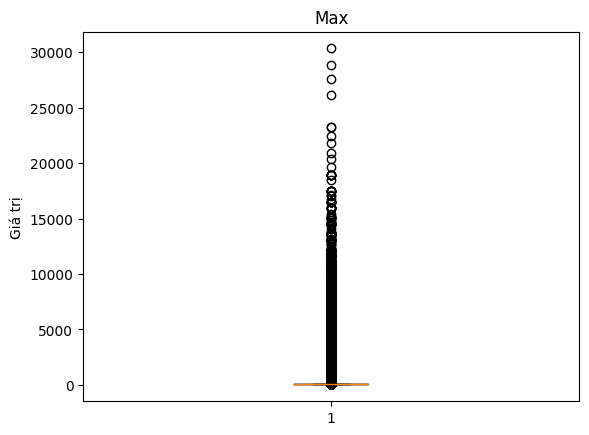

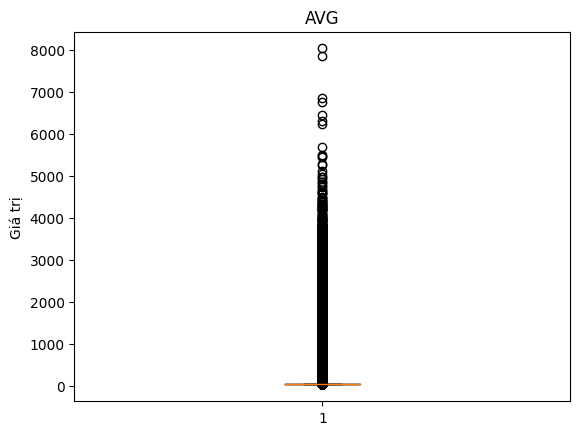

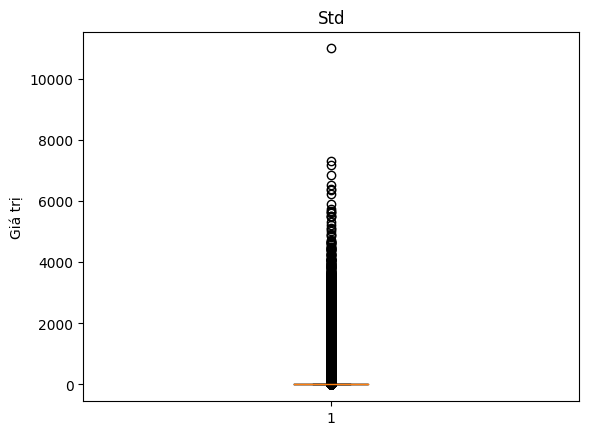

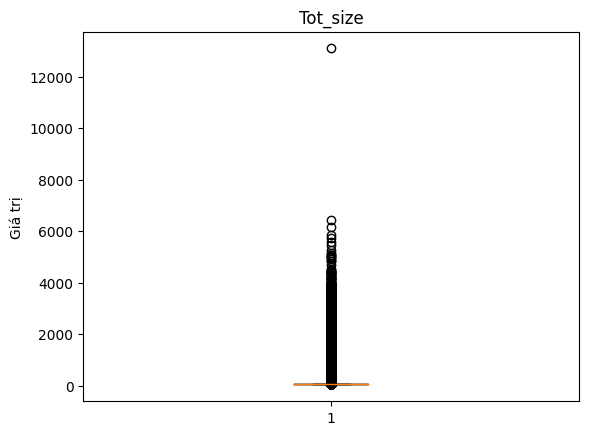

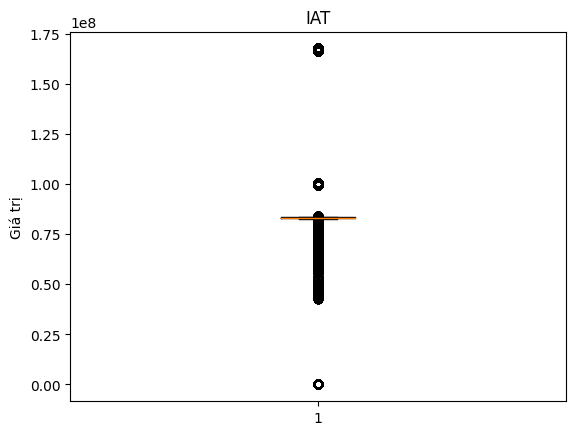

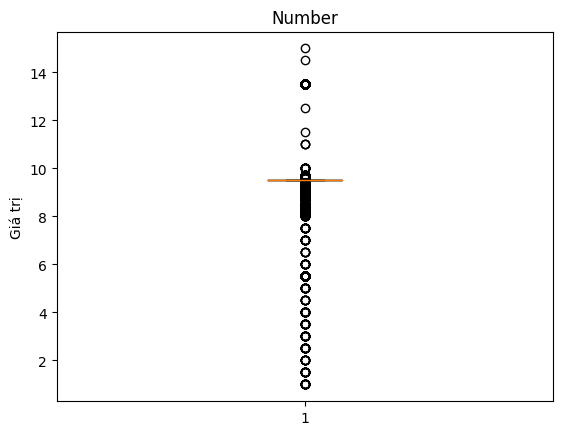

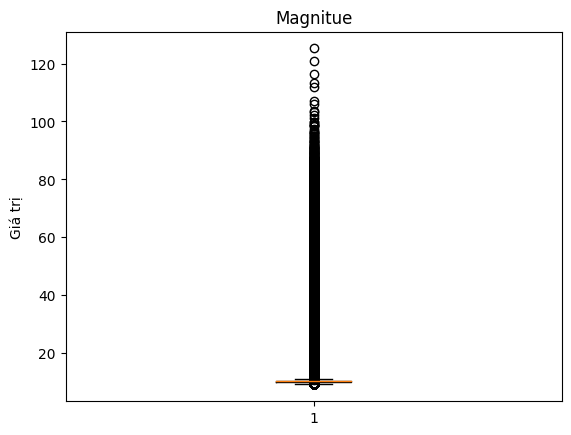

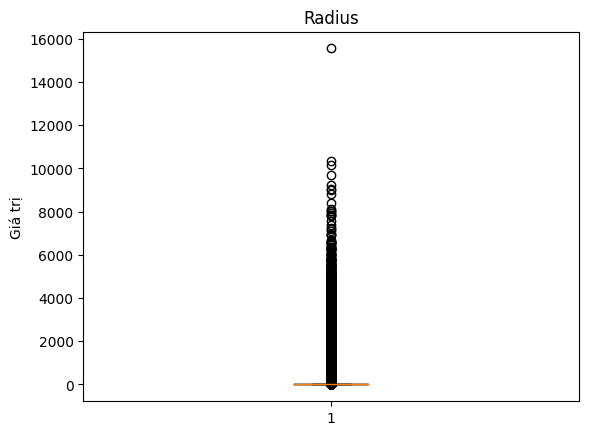

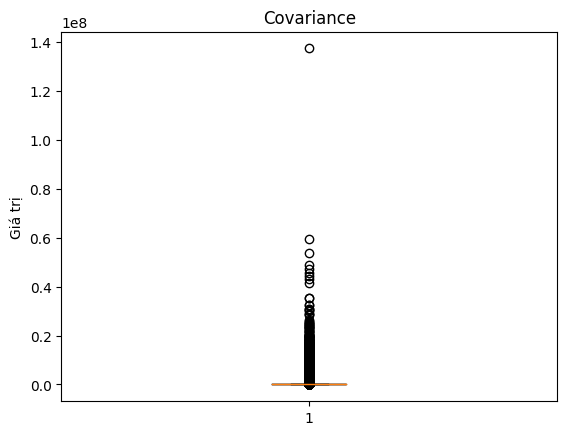

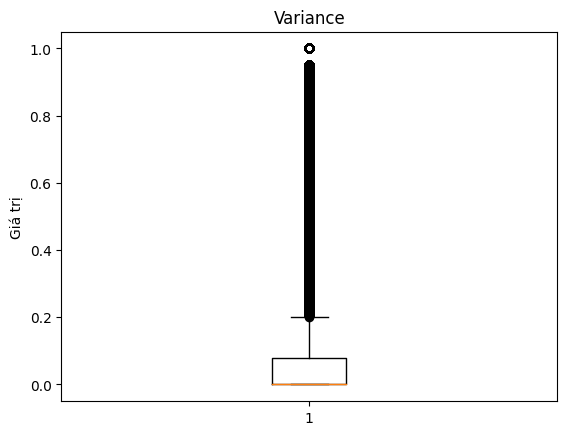

In [51]:

def show_plot(data, title): 
    plt.boxplot(data)
    plt.title(title)
    plt.ylabel('Giá trị')

    plt.show()

def analyze_each_field_of_dataset(data, col_names): 
    new_data = data.copy()
    for col_name in col_names:
        arr_col_name = new_data[col_name].values
        show_plot(arr_col_name, col_name)

analyze_each_field_of_dataset(data = data, col_names=col_names)

# show_plot(data = data['flow_duration'].value, title = 'tham so Flow duration')


In [5]:
## Nhãn bình thường
ORDINARY_LABEL_NAME = 'BenignTraffic'

## Gồm có 7 nhãn tấn công

DDOS_LABEL = [
    'DDoS-ICMP_Flood', 
    'DDoS-UDP_Flood', 
    'DDoS-TCP_Flood', 
    'DDoS-PSHACK_Flood', 
    'DDoS-SYN_Flood', 
    'DDoS-RSTFINFlood', 
    'DDoS-SynonymousIP_Flood', 
    'DDoS-ICMP_Fragmentation', 
    'DDoS-ACK_Fragmentation', 
    'DDoS-UDP_Fragmentation', 
    'DDoS-HTTP_Flood', 
    'DDoS-SlowLoris']

DOS_LABEL = [
    'DoS-UDP_Flood', 
    'DoS-TCP_Flood', 
    'DoS-SYN_Flood', 
    'DoS-HTTP_Flood']

MIRAI_LABEL = [
    'Mirai-greeth_flood', 
    'Mirai-udpplain', 
    'Mirai-greip_flood']

SPOOFING_LABEL = [
    'MITM-ArpSpoofing', 
    'DNS_Spoofing']

RECON_LABEL = [
    'Recon-HostDiscovery', 
    'Recon-OSScan', 
    'Recon-PortScan', 
    'Recon-PingSweep', 
    'VulnerabilityScan']

WEB_LABEL = [
    'SqlInjection', 
    'BrowserHijacking', 
    'CommandInjection', 
    'Backdoor_Malware', 
    'XSS', 
    'Uploading_Attack']

BRUTE_FORCE_LABEL = [
    'DictionaryBruteForce']

PROTOCOL_FIELDS = [
    'HTTP',
    'HTTPS',
    'DNS',
    'Telnet',
    'SMTP',
    'SSH',
    'IRC',
    'TCP',
    'UDP',
    'DHCP',
    'ARP',
    'ICMP',
    'IPv',
    'LLC'
]

In [34]:
CONST_DROPPED_LABEL = [
    'HTTP', 
    'HTTPS', 
    'DNS', 
    'Telnet', 
    'SMTP', 
    'SSH', 
    'IRC', 
    'TCP', 
    'DHCP', 
    'ICMP', 
    'IPv', 
    'LLC']

In [6]:
def delete_field_of_data(data, fields = []):
    data = data.copy() 
    new_data = data.drop(fields, axis = 1)
    return new_data

## Tách tập dữ liệu thành 2 phần gồm có dữ liệu bình thường và dữ liệu tấn công

In [13]:
def split_label_two_classes(data): 
    new_data = data.copy()

    def group_two_label(label): 
        if label == ORDINARY_LABEL_NAME: 
            return 1 
        return 0

    new_data['two_label'] = new_data['label'].apply(group_two_label)
    return new_data

In [6]:
## Tách tập dữ liệu thành 7 nhóm tấn công gồm có DDoS, DoS, Mirai, Spoofing, Recon, Web, Bruce Force, Web
def split_label_eight_classes(data): 
    new_data = data.copy()
    return new_data


new_data = split_label_two_classes(data)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191264 entries, 0 to 227490
Data columns (total 36 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   flow_duration    1191264 non-null  float64
 1   Header_Length    1191264 non-null  float64
 2   Protocol_Type    1191264 non-null  float64
 3   Duration         1191264 non-null  float64
 4   Rate             1191264 non-null  float64
 5   Srate            1191264 non-null  float64
 6   Drate            1191264 non-null  float64
 7   fin_flag_number  1191264 non-null  float64
 8   syn_flag_number  1191264 non-null  float64
 9   rst_flag_number  1191264 non-null  float64
 10  psh_flag_number  1191264 non-null  float64
 11  ack_flag_number  1191264 non-null  float64
 12  ece_flag_number  1191264 non-null  float64
 13  cwr_flag_number  1191264 non-null  float64
 14  ack_count        1191264 non-null  float64
 15  syn_count        1191264 non-null  float64
 16  fin_count        1191264

In [14]:

### Training model LSTM
def LSTM_model(data):
    data = data.copy()
    X_data, Y_data = data.iloc[:, 0: -1], data.iloc[:, -1]
        
    X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2)

    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

    model = Sequential()
    model.add(LSTM(units = 64, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(optimizer = "adam", metrics = ['accuracy'], loss = 'binary_crossentropy')
    model.summary()
    model.fit(X_train, Y_train, epochs = 5, batch_size = 64, validation_data = (X_test, Y_test))
    model.save("two_label_predictions.h5")
    

# lstm_model = LSTM_model(new_data)

In [35]:
file_paths_test = [
     '../data/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
     # '../data/part-00008-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
     # '../data/part-00009-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
]

# data_test = merge_data_from_multiple_file(file_paths=file_paths_test, col_names=col_names)

In [ ]:
new_data_test = split_label_two_classes(data_test)
print(new_data_test)

        flow_duration  Header_Length  Protocol_Type  Duration         Rate  \
0            0.000000          54.00           6.00     64.00     0.329807   
1            0.000000          57.04           6.33     64.00     4.290556   
2            0.000000           0.00           1.00     64.00    33.396799   
3            0.328175       76175.00          17.00     64.00  4642.133010   
4            0.117320         101.73           6.11     65.91     6.202211   
...               ...            ...            ...       ...          ...   
238682       0.000000          54.00           6.00     64.00     3.049186   
238683       0.000000          54.00           6.00     64.00   183.433732   
238684       0.000785          56.29           6.11     64.00   306.952216   
238685       0.000901          72.09           6.11     64.64   158.475986   
238686       0.000000           0.00           1.00     64.00     1.291274   

              Srate  Drate  fin_flag_number  syn_flag_number  r

<Axes: >

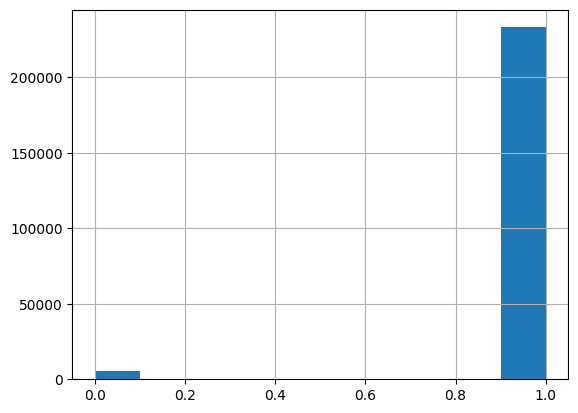

In [ ]:
new_data_test = delete_field_of_data(new_data_test, fields=CONST_DROPPED_LABEL)
new_data_test['two_label'].hist()

In [13]:
oridinary_data_test = new_data_test[new_data_test['two_label'] == 0]
drop_field = ['label', 'two_label']
X_data_test = oridinary_data_test.drop(drop_field, axis = 1)
Y_data_test = oridinary_data_test['two_label']


X_data_test = np.reshape(X_data_test, (X_data_test.shape[0], 1, X_data_test.shape[1]))
print(X_data_test.shape)
print(Y_data_test.shape)
loss, accuracy = lstm_model.evaluate(X_data_test, Y_data_test)
print(loss, accuracy)

NameError: name 'new_data_test' is not defined

[ 0.          0.          0.         ... 19.1790712   0.
 -0.08956577]


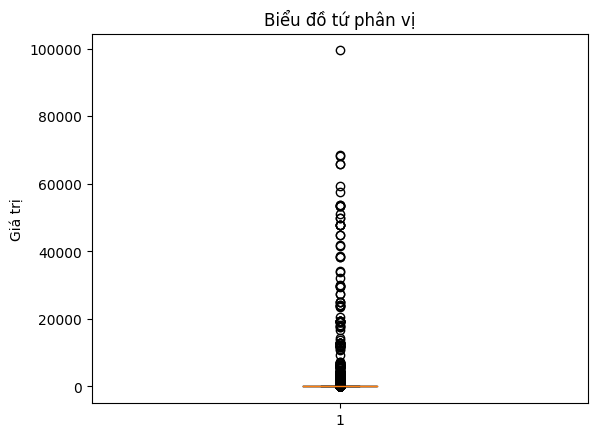

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Tạo dữ liệu mẫu
np.random.seed(1)
data_test = np.random.normal(loc=0, scale=data['flow_duration'])
print(data_test)
# Hiển thị biểu đồ tứ phân vị
plt.boxplot(data['Variance'].values)

# Đặt tiêu đề và nhãn trục
plt.title('Biểu đồ tứ phân vị')
plt.ylabel('Giá trị')

# Hiển thị biểu đồ
plt.show()

### Từ những dữ liệu trên có thể thấy được những field có thể không ảnh hưởng nhiều dến kết quả của một nhãn
- fin_fag_number
- syn_flag_number
- rst_flag_number
- psh_flag_number
- ece_flag_number
- cwr_flag_number
- http
- https
- DNS
- Telnet
- SMTP 
- SSH
- IRC
- UDP
- DHCP
- ARP
- ICMP
- IPv
- LLC

In [142]:
def apply_model(data): 
    CONST_DROP_FIELD = [
        'fin_flag_number',
        'syn_flag_number',
        'rst_flag_number',
        'psh_flag_number',
        'ece_flag_number',
        'cwr_flag_number',
        'HTTP', 
        'HTTPS',
        'DNS',
        'Telnet',
        'SMTP',
        'SSH',
        'IRC',
        'TCP',
        'UDP',
        'DHCP',
        'label'
]
    ## cung cấp dư liệu
    new_data = data.copy()
   
    ## Xử lý dữ liệu
    new_data = split_label_two_classes(new_data)
    new_data = delete_field_of_data(new_data, fields=CONST_DROP_FIELD)
    print(new_data.columns)
    LSTM_model(new_data)
    # print(new_data)
    
    
    ## Trainning model và đánh giá model
    # lstm_model = LSTM_model(new_data)
apply_model(data)


Index(['flow_duration', 'Header_Length', 'Protocol_Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'ack_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'ARP', 'ICMP', 'IPv', 'LLC',
       'tot_sum', 'Min', 'Max', 'AVG', 'Std', 'Tot_size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'two_label'],
      dtype='object')
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 64)                24320     
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 24385 (95.25 KB)
Trainable params: 24385 (95.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1489

e:\do_an_tot_nghiep\dev\env\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Xây dựng tỉ lệ thuật toán theo những tỉ lệ sau
- 80: 20
- 70: 30
- 60: 40

In [18]:
def make_unsam_ratio(data, ratio = 80 / 20 ):
    [benign, attack] = split_two_classes(data)
    len_benign = len(benign)
    
    attack = attack.iloc[0: (len_benign * ratio), : ]

    new_data = pd.concat([attack, benign])

    return new_data

def make_unsam_70_30(data):
    [benign, attack] = split_label_two_classes(data)
    len_benign = len(benign)
    attack = attack.iloc[0: (len_benign * 7) // 3, : ]

    new_data = pd.concat([attack, benign])
    return new_data

### Kiểm tra độ chính xác của thuật toán


In [19]:
def format_data(file_paths = [], col_names = []):
    ## Chuẩn bị dữ liệu
    CONST_DROP_FIELD = [
        'fin_flag_number',
        'syn_flag_number',
        'rst_flag_number',
        'psh_flag_number',
        'ece_flag_number',
        'cwr_flag_number',
        'HTTP', 
        'HTTPS',
        'DNS',
        'Telnet',
        'SMTP',
        'SSH',
        'IRC',
        'TCP',
        'UDP',
        'DHCP',
        'ARP',
        'ICMP',
        'IPv',
        'LLC',
        'Min',
        'label'
    ]
    data = merge_data_from_multiple_file(file_paths, col_names)
    data = make_unsam_ratio(data, 50//50)

    data = split_label_two_classes(data)
    data = delete_field_of_data(data, fields=CONST_DROP_FIELD)
    print(data.columns)
    LSTM_model(data)

format_data(file_paths = file_paths, col_names = col_names)


Index(['flow_duration', 'Header_Length', 'Protocol_Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'ack_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'tot_sum', 'Max', 'AVG', 'Std',
       'Tot_size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance',
       'Variance', 'Weight', 'two_label'],
      dtype='object')
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                23040     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 23105 (90.25 KB)
Trainable params: 23105 (90.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
980/980 [==============================] 

e:\do_an_tot_nghiep\dev\env\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### Xây dựng tập dữ liệu chỉ có nhãn bình thường


In [21]:
def validate_LSTM_model(file_paths = [], col_names = []): 
    CONST_DROP_FIELD = [
        'fin_flag_number',
        'syn_flag_number',
        'rst_flag_number',
        'psh_flag_number',
        'ece_flag_number',
        'cwr_flag_number',
        'HTTP', 
        'HTTPS',
        'DNS',
        'Telnet',
        'SMTP',
        'SSH',
        'IRC',
        'TCP',
        'UDP',
        'DHCP',
        'ARP',
        'ICMP',
        'IPv',
        'LLC',
        'Min',
        'label'
    ]
    data = merge_data_from_multiple_file(file_paths=file_paths_test, col_names=col_names)
    data = data.query('label != @ORDINARY_LABEL_NAME')
    data = split_label_two_classes(data)
    data = delete_field_of_data(data, fields=CONST_DROP_FIELD)
    

    X_test = data.iloc[:, 0:-1]
    Y_test = data.iloc[:, -1]


    X_test = X_test.values
    Y_test = Y_test.values

    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

    
    model_path = 'two_label_predictions.h5'
    lstm_model = tf.keras.models.load_model(model_path)
    loss, accuracy = lstm_model.evaluate(X_test, Y_test)
    print(loss, accuracy)

file_paths_test = [
     '../data/part-00007-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
     '../data/part-00008-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
     '../data/part-00009-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
]
validate_LSTM_model(file_paths=file_paths_test, col_names=col_names)

21413/21413 [==============================] - 44s 2ms/step - loss: 0.4335 - accuracy: 0.9916
0.4335380494594574 0.9916139841079712


In [ ]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional


def get_LSTM_model():
    model = Sequential()


    return model